In [23]:
# importing libraries
import ast
import pandas as pd 
from datasets import load_dataset
import matplotlib.pyplot as plt 

# loading data 
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for US Data Analyst Roles


In [24]:
df_DA_US = df[(df['job_country']== 'United States') & (df['job_title_short']== 'Data Analyst')]

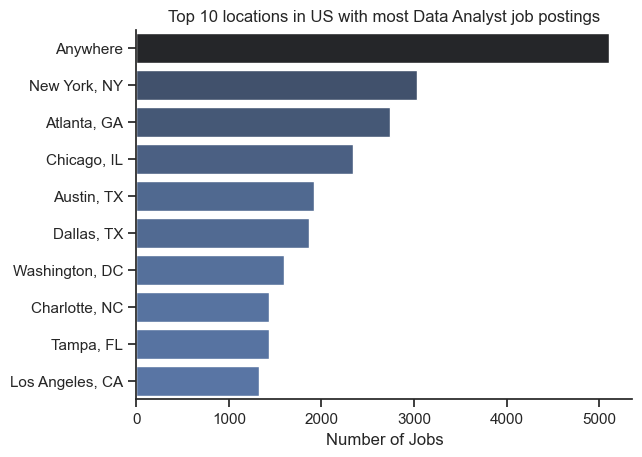

In [25]:
df_plot= df_DA_US['job_location'].value_counts().head(10).to_frame()

import seaborn as sns

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Top 10 locations in US with most Data Analyst job postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

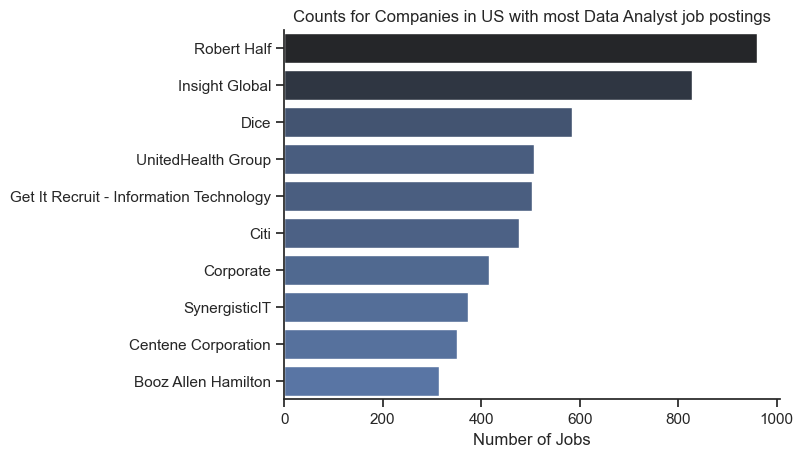

In [26]:
df_plot= df_DA_US['company_name'].value_counts().head(10).to_frame()

import seaborn as sns

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts for Companies in US with most Data Analyst job postings')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

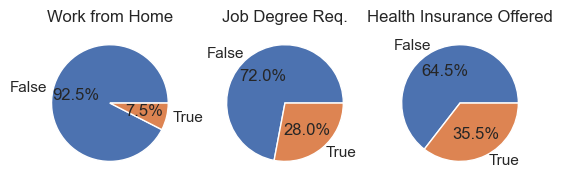

In [27]:
fig,ax = plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
    }
for i, (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels = df_DA_US[column].value_counts().index, autopct='%1.1f%%')
    ax[i].set_title(title)


# ax.pie(df['dict_column'].value_counts())
plt.show()